# Bài tập bổ sung

> Phần bài tập này là các câu hỏi  mở rộng, làm tiếp theo bài toán ở trên. Học viên cần viết mã để thực hiện các yêu cầu dưới đây:

Bài tập 0: Sử dụng sns.boxplot() để quan sát đặc điểm phân bố dữ liệu của các trường số, mỗi trường này có outlier ko?

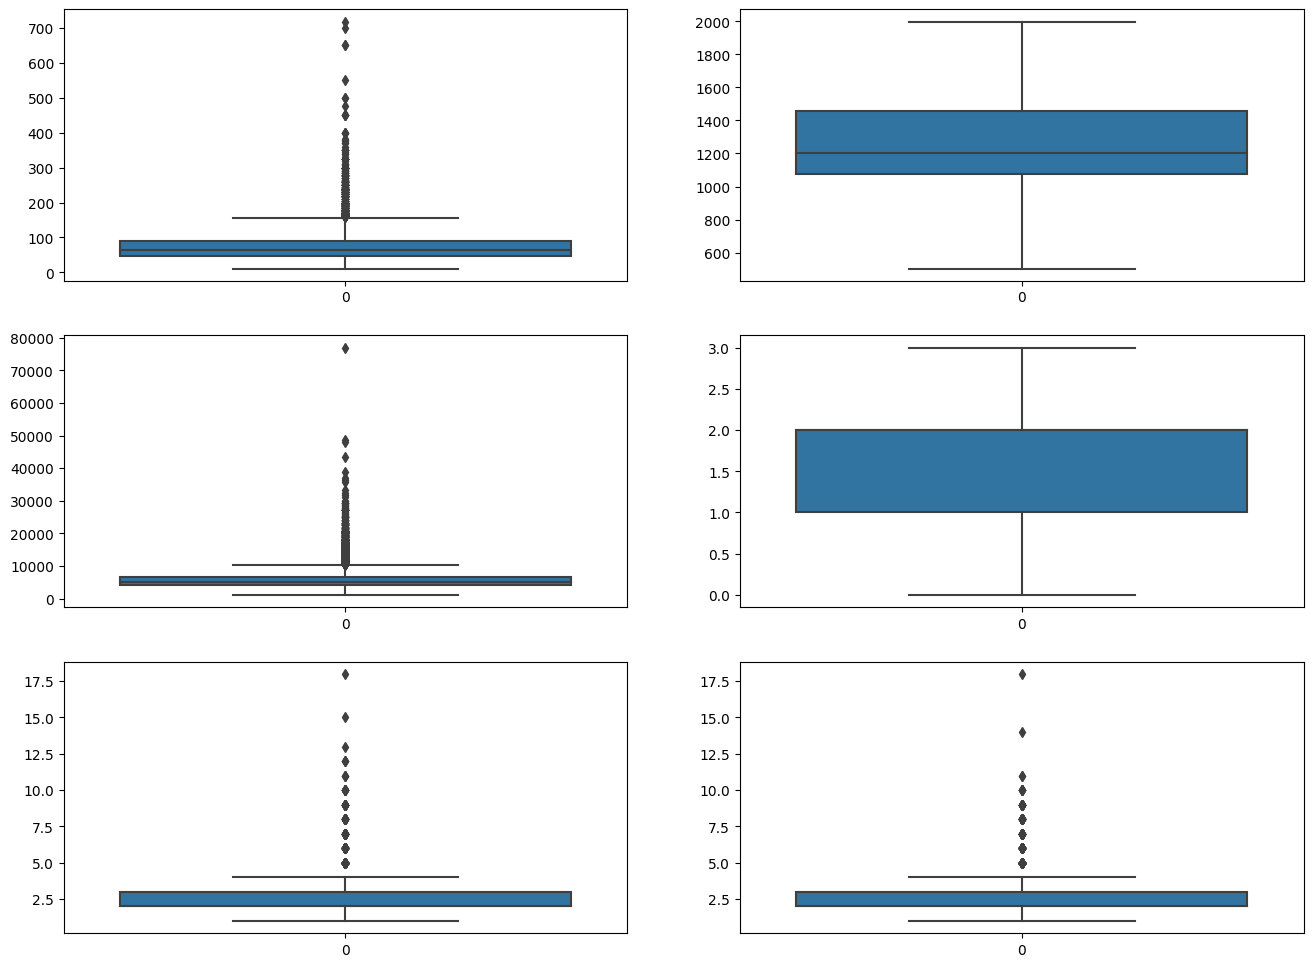

In [ ]:
# Sử dụng boxplot để quan sát phân bố của dữ liệu, phát hiện ngoại lai (xử lí nếu cần) của từng trường dữ liệu trong vars
# Gợi ý: sns.boxplot(data_field)

vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16,12))

#Code ở đây
for i,var in enumerate(vars):
  plt.subplot(3,2,i+1)
  sns.boxplot(df8[var])

Bài tập 1: Viết hàm bỏ đi các điểm dữ liệu có price per sqft dựa trên mean, std của các ngôi nhà dựa trên từng vị trí

> Gợi ý: Xét trên từng vị trí (location), ngôi nhà thỏa mãn phải có $price\_per\_sqft \in [mean - std, mean + std]$

In [ ]:
def remove_pps_outliers(df):
  #Code ở đây
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
#--------
df9 = remove_pps_outliers(df8)
df9.shape

(8256, 11)

Bài tập 2: Loại bỏ outlier xét theo trường bkh (số phòng)

Xét theo từng khu vực địa lí và theo từng loại nhà với số lượng phòng khác nhau, có một số ngôi nhà có giá không hợp lí (outliers), hãy tìm cách loại bỏ các outlier này. Cần ghi rõ quy tắc ghi nhận outlier

In [ ]:
def remove_bhk_outliers(df):
  # Code ở đây
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df10 = remove_bhk_outliers(df9)
df10.shape

(4890, 11)

Bài tập 3: Loại bỏ outlier khi xét trường 'bathroom'

In [ ]:
df10.bath.unique() #Có thể quan sát thấý một số căn nhà có số phòng tắm quá lớn (VD: 10!!!)

array([ 3.,  2.,  1.,  7.,  4.,  6.,  5.,  8.,  9., 10.])

In [ ]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
1649,Plot Area,Ready To Move,Chamrajpet,6 Bedroom,1500,9.0,3.0,230.0,1500.0,6,15333.333333
7064,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.0,116.0,1806.0,3,6423.034330


In [ ]:
df11 = df10[df10.bath < df10.bhk+2]
df11.shape

(4878, 11)

In [ ]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
3,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,1250,2.0,3.0,44.0,1250.0,3,3520.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


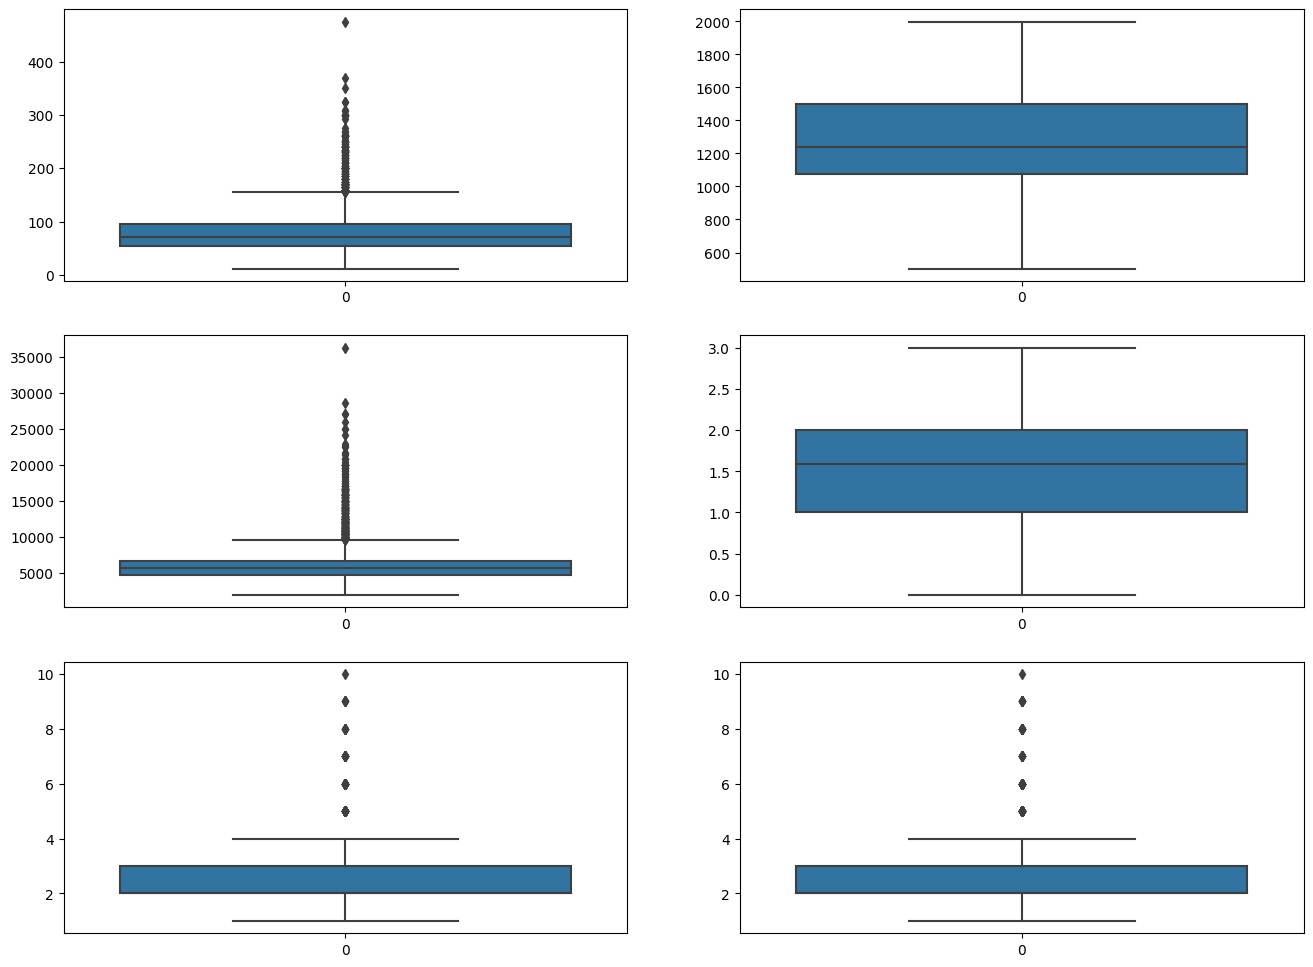

In [ ]:
# Quan sát lại kết quả sau khi xử lí với boxplot
plt.figure(figsize=(16,12))
for i,var in enumerate(vars):
  plt.subplot(3,2,i+1)
  sns.boxplot(df11[var])
# (Dùng lại hàm đã code bên trên)

Bài tập 4: Xem xét bỏ đi các trường không cần thiết

Gợi ý: bỏ đi ['area_type', 'availability',"location","size","total_sqft"]

In [ ]:
df12 = df11.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
df12.head()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
3,2.0,3.0,44.0,1250.0,3,3520.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [ ]:
#Lưu kết quả xử lí cuối cùng:

df12.to_csv("clean_data.csv", index=False)

Bài tập 5*: Viết hàm trực quan hóa thể hiện mối tương quan giữa tổng diện tích (total_sqft) và giá nhà (price) theo từng vị trí địa lí (location) (tùy chọn minh họa theo 2 vị trí nào đó), của những căn nhà có 2 hoặc 3 phòng. Và cần phân biệt rõ điểm dữ liệu nào tương ứng với nhà có 2 phòng, điểm nào tương ứng với nhà có 3 phòng?

Gợi ý: Kết quả tương tự như hình dưới/ hoặc biểu đồ khác có ý nghĩa tương đương

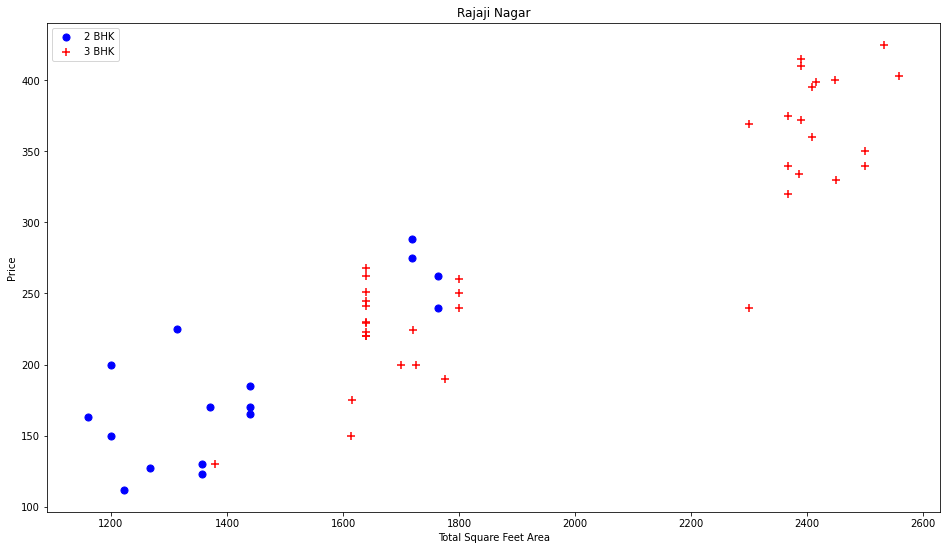

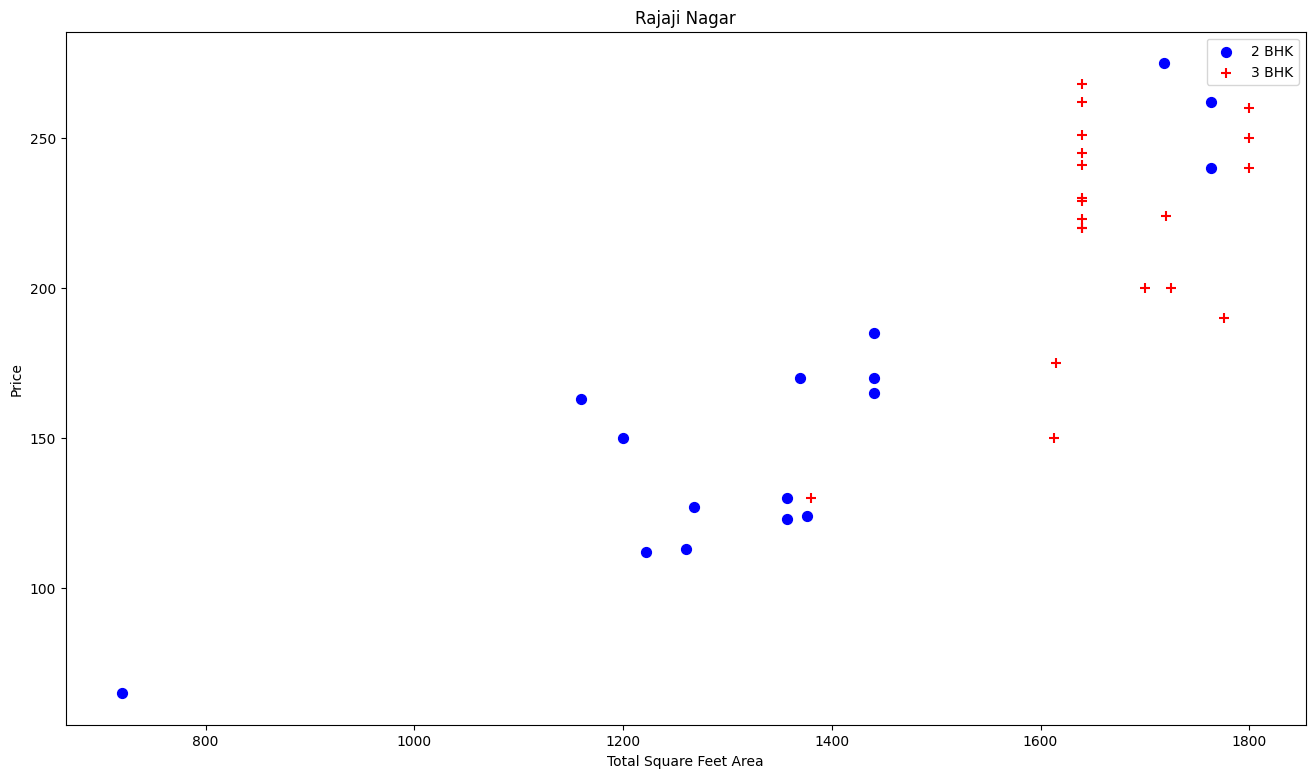

In [ ]:
#Gợi ý: Sử dụng plt.scatter() .... hoạc câu lệnh khác tương đương. Làm với df9

def plot_scatter_chart(df,location):
  #Viết code ở đây
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_float, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_float, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df9, "Rajaji Nagar")

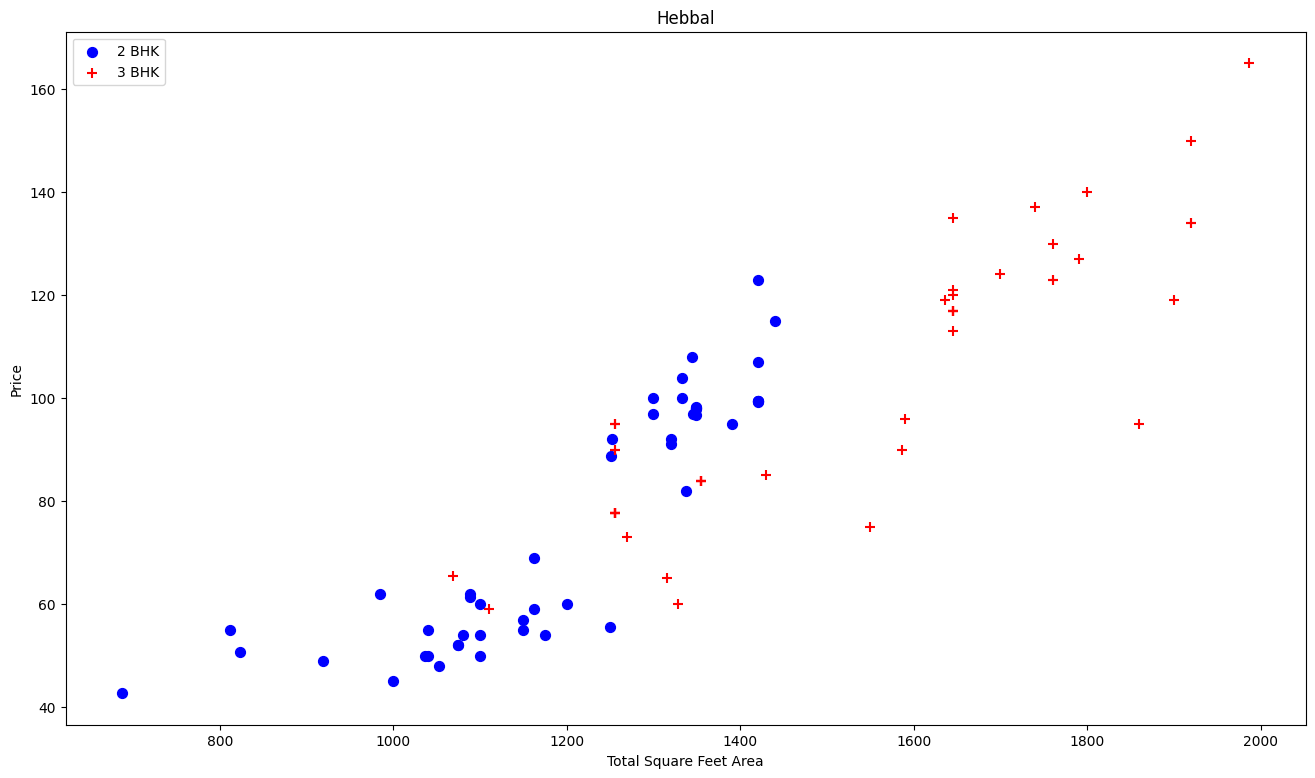

In [ ]:
plot_scatter_chart(df9, "Hebbal")

Bài tập 6*: Thực hiện các câu lệnh để trả lời các câu hỏi dưới đây:

<ipython-input-52-92db9328a2fb>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df2['area_type'], rotation=60, horizontalalignment= 'right')


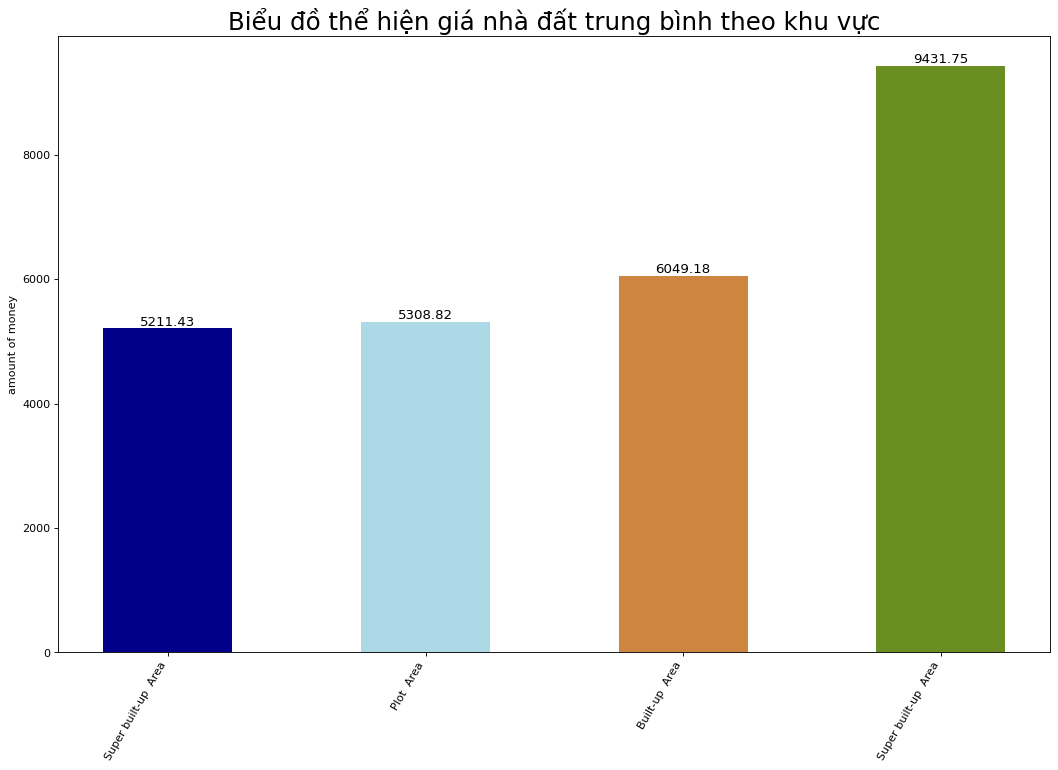

In [ ]:
# Code ở đây
import random

df91 = df9.groupby('area_type')['price_per_sqft'].mean().reset_index(name='money')
df91 = df91.sort_values(by = 'money')

df91['money'] = df91['money'].apply(lambda x : round(x, 2))
n = df91['area_type'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())

random.seed(100) #Chọn màu ngẫu nhiên cho các cột :)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df91['area_type'], df91['money'], color=c, width=.5)
for i, val in enumerate(df91['money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['area_type'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo khu vực", fontsize=22)
plt.ylabel('amount of money')
# plt.ylim(25,35)
plt.show()